## Observations and Insights 

(1) From the boxplot, it appears that, of the four most promsing drug regimens, mice treated with Capomulin and Ramicane had significantly lower final tumor volumes than those treated with  Infubinol or Ceftamin. While the means and medians for each drug regimen were relatively close (within about 10 mm^3), these two treatments had noticeably lower standard deviation, meaning that they were more consistently effective for mice in their respective groups. 

(2) The positive slope in the regression line indicates that there is a positive correlation between mouse weight and tumor volume for mice treated with Capomulin. For every additional unit of weight a given mouse weighs, we predict that the average tumor volume goes up by 0.95mm^3.

(3) Looking at the tumor volume for Mouse l509 across timepoints, the tumor volume has a general downward trend--adding to evidence that Capomulin is effective. Interestingly, however the tumor did not only shrink; at certain timepoints, there was a recorded increase. 

In [1]:
# Dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

# Data files
mouse_metadata_path  = os.path.join("Resources", "Mouse_metadata.csv")
study_results_path = os.path.join("Resources", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merge = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

In [2]:
# Check the number of mice in the DataFrame.
mouse_study_merge['Mouse ID'].value_counts().head()

g989    13
q511    10
o562    10
w575    10
a644    10
Name: Mouse ID, dtype: int64

In [24]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_data=mouse_study_merge[mouse_study_merge.duplicated(subset=["Timepoint","Mouse ID"],keep="first")]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_data = mouse_study_merge[mouse_study_merge['Mouse ID'] != 'g989']

In [26]:
# Check the number of mice in the clean DataFrame
complete_data.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [6]:
# Generate summary statistics mean, median, variance, standard deviation, and SEM of the tumor volume
mean = complete_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = complete_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var = complete_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
st_dev = complete_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
SEM = complete_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


In [7]:
# Generate a summary statistics table for each regimen
complete_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":
                                           ["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

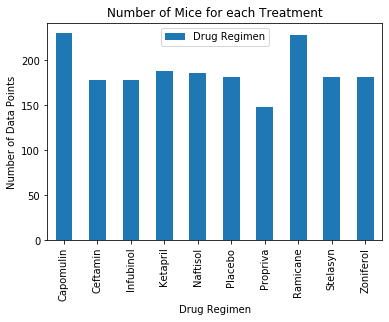

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#Create data_points by counting the data
data_points = pd.DataFrame(complete_data.groupby("Drug Regimen")["Drug Regimen"].count())

bar_pandas = data_points.plot(kind="bar",
                              title="Number of Mice for each Treatment")

#Format the Figure
bar_pandas.set_xlabel("Drug Regimen")
bar_pandas.set_ylabel("Number of Data Points")

#Save the figure to Images
plt.savefig("Images/PandaBarPlot.png")

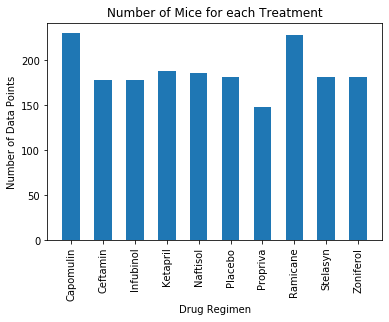

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#Set up x_axis and x ticks
x_axis = np.arange(len(data_points))
tick_labels = [value for value in x_axis]

bar_pyplot = plt.bar(x_axis, 
                     data_points["Drug Regimen"], 
                     align="center", 
                     width = 0.55)
#Format the Figure
plt.xticks(tick_labels, list(data_points.index), rotation="vertical")
plt.title("Number of Mice for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

#Save the figure to Images
plt.savefig("Images/PyPlotBarPlot.png")

## Pie Plots

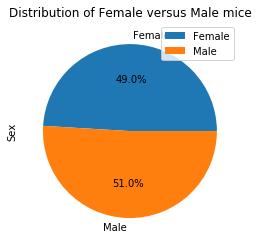

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Group the data by the sex of the mice
mouse_sex = pd.DataFrame(complete_data.groupby("Sex")["Sex"].count())

pie_pandas = mouse_sex.plot(kind="pie",
                            y="Sex", 
                            title= "Distribution of Female versus Male mice", 
                            autopct='%1.1f%%')
#Save the figure to Images
plt.savefig("Images/PandaPiePlot.png")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


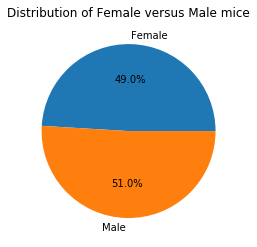

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_labels = ["Female","Male"]
pie_pyplot = plt.pie(mouse_sex, 
                     labels=pie_labels, 
                     autopct="%1.1f%%")
#Format the Figure
plt.title("Distribution of Female versus Male mice")

#Save the figure to Images
plt.savefig("Images/PyPlotPiePlot.png")

## Quartiles, Outliers and Boxplots

In [12]:
#Create Subset of complete_data for four most promising treatments ("Capomulin", "Ramicane", "Infubinol","Ceftamin")
capomulin = complete_data.loc[complete_data["Drug Regimen"] == "Capomulin"]
ramicane = complete_data.loc[complete_data["Drug Regimen"] == "Ramicane"]
infubinol = complete_data.loc[complete_data["Drug Regimen"] == "Infubinol"]
ceftamin = complete_data.loc[complete_data["Drug Regimen"] == "Ceftamin"]

#Find final tumor volume for four treatments (Final is at Timepoint = 45)
cap_final = capomulin.loc[capomulin["Timepoint"]== 45]["Tumor Volume (mm3)"]
ram_final = ramicane.loc[ramicane["Timepoint"] == 45]["Tumor Volume (mm3)"]
inf_final = infubinol.loc[infubinol["Timepoint"] == 45]["Tumor Volume (mm3)"]
cef_final = ceftamin.loc[ceftamin["Timepoint"] == 45]["Tumor Volume (mm3)"]


#Put together data list
four_treatments = [cap_final, ram_final, inf_final, cef_final]
treatment_labels = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

In [13]:
#Calculate IQR and Outlier thresholds for Capomulin
cap_quartiles = cap_final.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

print(cap_iqr)
print(cap_lower_bound, cap_upper_bound)

#Check for outliers:
#cap_final,
print("None of the values for Capomulin fall outside of the outlier bounds.")

7.781863460000004
20.70456164999999 51.83201549
None of the values for Capomulin fall outside of the outlier bounds.


In [14]:
#Calculate IQR and Outlier thresholds for Ramicane
ram_quartiles = ram_final.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

print(ram_iqr)
print(ram_lower_bound, ram_upper_bound)

#Check for outliers:
#ram_final
print("None of the values for Ramicane fall outside of the outlier bounds.")

7.527130082499998
19.690480101250003 49.79900043124999
None of the values for Ramicane fall outside of the outlier bounds.


In [23]:
#Calculate IQR and Outlier thresholds for Infubinol
inf_quartiles = inf_final.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

print(inf_iqr)
print(inf_lower_bound, inf_upper_bound)

#Check for outliers:
#inf_final
print("None of the values for Infubinol fall outside of the outlier bounds.")

4.9311172099999965
55.35777559500001 75.08224443499999
None of the values for Infubinol fall outside of the outlier bounds.


In [21]:
#Calculate IQR and Outlier thresholds for Ceftamin
cef_quartiles = cef_final.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

print(cef_iqr)
print(cef_lower_bound, cef_upper_bound)

#Check for outliers:
#cef_final
print("None of the values for Ceftamin fall outside of the outlier bounds.")

6.093590140000003
52.29350701999999 76.66786758


493     62.999356
993     61.849023
1033    68.923185
1112    67.748662
1132    59.851956
1162    64.299830
1260    59.741901
1379    61.433892
1670    67.527482
1773    64.634949
1797    61.386660
1845    68.594745
1855    64.729837
Name: Tumor Volume (mm3), dtype: float64

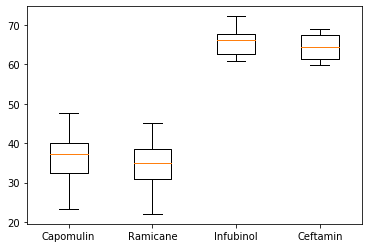

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
boxplot = ax1.boxplot(four_treatments,labels=treatment_labels)

#Save the figure to Images
plt.savefig("Images/BoxPlot.png")

## Line and Scatter Plots

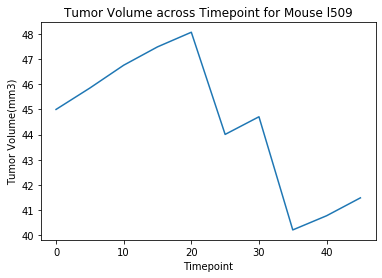

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_timepoint = capomulin.loc[capomulin["Mouse ID"]=="l509"]["Timepoint"]
y_tumor = capomulin.loc[capomulin["Mouse ID"]=="l509"]["Tumor Volume (mm3)"]

plt.plot(x_timepoint,y_tumor)

#Format the Figure
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume(mm3)")
plt.title ("Tumor Volume across Timepoint for Mouse l509")

#Save the figure to Images
plt.savefig("Images/LinePlot.png")

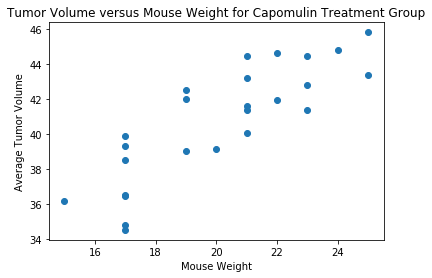

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_weight_mean = capomulin.groupby('Mouse ID').mean()['Weight (g)']
cap_tumor_mean = capomulin.groupby('Mouse ID').mean()['Tumor Volume (mm3)']

plt.scatter(cap_weight_mean,cap_tumor_mean)

#Format the Figure
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Tumor Volume versus Mouse Weight for Capomulin Treatment Group")

#Save the figure to Images
plt.savefig("Images/ScatterPlot.png")

## Correlation and Regression

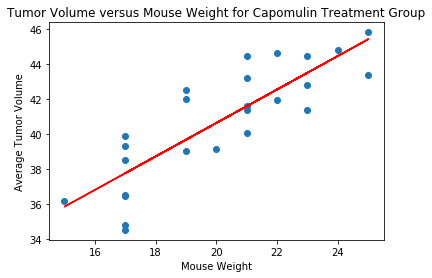

In [28]:
# Calculate the correlation coefficient
r = stats.pearsonr(cap_weight_mean,cap_tumor_mean)
rsq = r[1]

#Run Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(cap_weight_mean, cap_tumor_mean)
regress_values = cap_weight_mean * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(cap_weight_mean,cap_tumor_mean)
plt.plot(cap_weight_mean,regress_values,"r-")

#Format the Figure
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Tumor Volume versus Mouse Weight for Capomulin Treatment Group")

#Save the figure to Images
plt.savefig("Images/RegressionPlot.png")

In [29]:
print(f"The regression line equation is {line_eq}")
print(f"The correlation coefficient is {rsq}")

The regression line equation is y = 0.95x + 21.55
The correlation coefficient is 1.322572243471279e-07
